# Creación de las redes de Tumor primario en seno usando NetworkX

Se cargan las librerias que se van a ocupar

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import networkx.algorithms.community as nx_comm
import numpy as np
from ipywidgets import *
import math as math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# TCGA

## Para Tejido con tumor primario en seno
### Umbral >= 0.35





In [2]:
#Lectura del archivo de la red a analizar
file = open("0.35.txt")

#G=nx.read_weighted_edgelist(file,create_using=nx.Graph(),nodetype=str)
G=nx.read_weighted_edgelist(file)



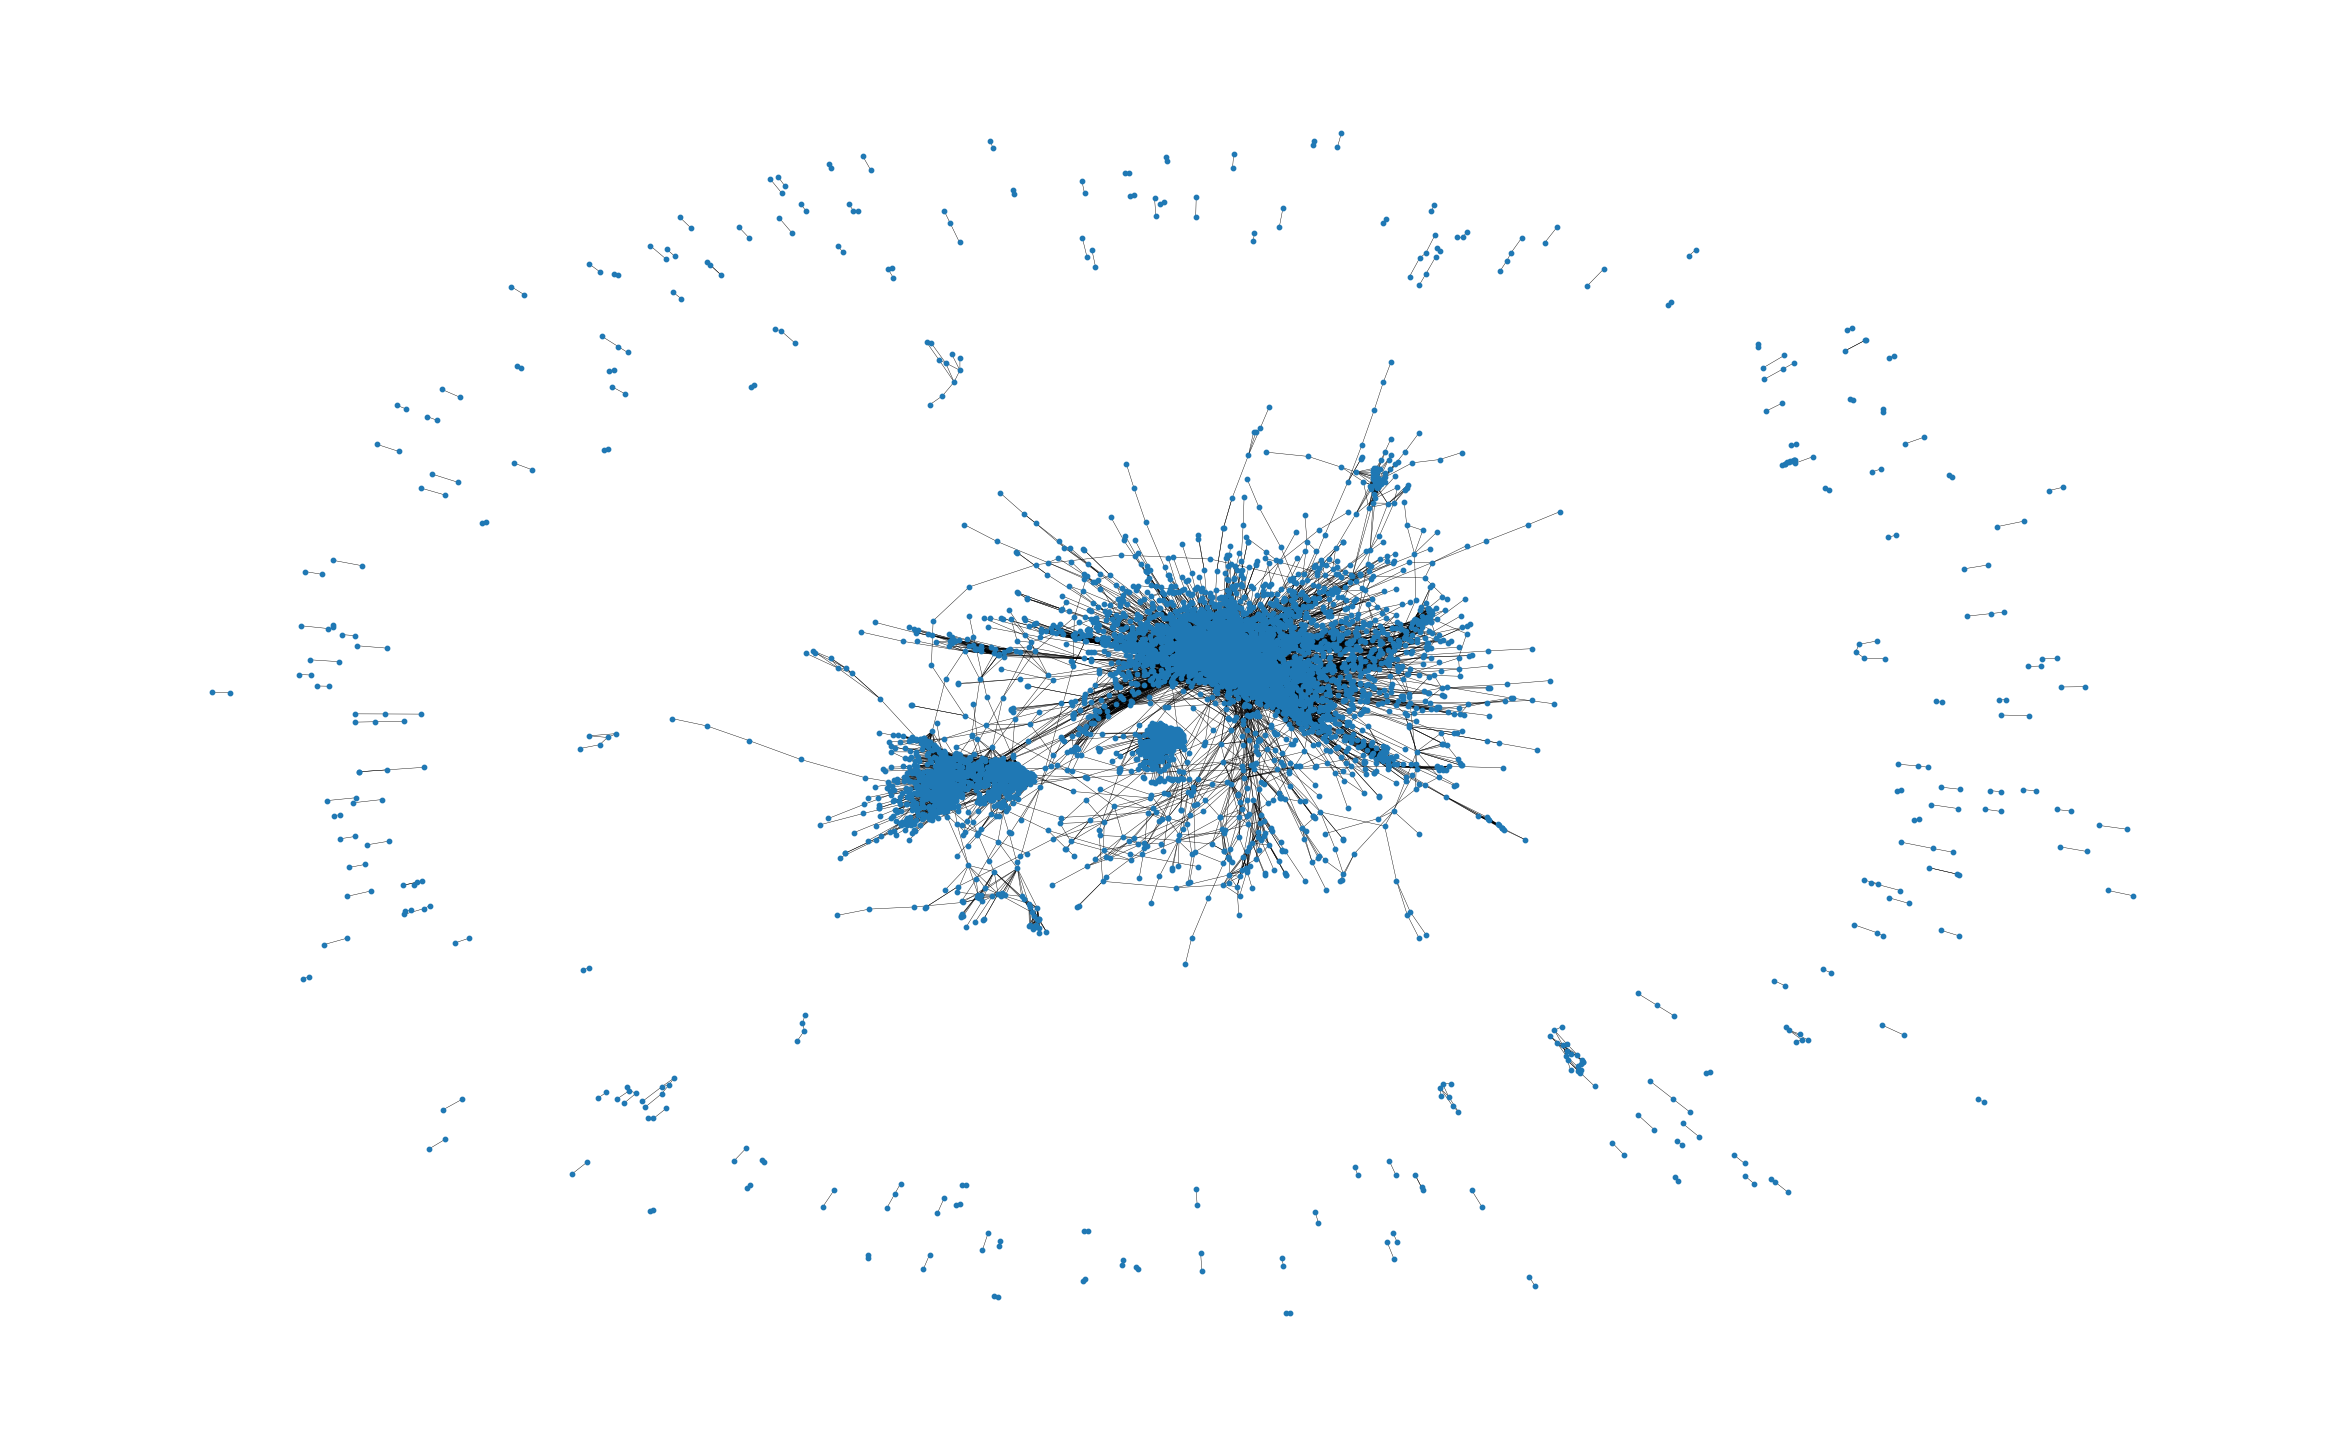

<Figure size 640x480 with 0 Axes>

In [3]:
#Impresión de la red que se pretende analizar. en 2D
anch = 30
alt = anch/float(1.6180334)
fig, ax = plt.subplots(figsize=(anch, alt))
nx.draw(G,node_size = 10, width = 0.3,)
plt.show()

plt.savefig("TejidoSano.jpg")
dgenes = dict(nx.degree(G))



In [4]:
# 3d spring layout
#pos = nx.spring_layout(G, dim=3, seed=779)
# Extract node and edge positions from the layout
#node_xyz = np.array([pos[v] for v in sorted(G)])
#edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
#fig = plt.figure()
#ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
#ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
#for vizedge in edge_xyz:
#    ax.plot(*vizedge.T, color="tab:gray")


#def _format_axes(ax):
#    """Visualization options for the 3D axes."""
    # Turn gridlines off
#    ax.grid(False)
    # Suppress tick labels
#    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
#        dim.set_ticks([])
    # Set axes labels
#    ax.set_xlabel("x")
#    ax.set_ylabel("y")
#    ax.set_zlabel("z")


#_format_axes(ax)
#fig.tight_layout()
#plt.savefig("Figura Red3D.jpg")
#plt.show()


In [5]:

#Ordenamiento de los valores
seqgenes = sorted(dgenes.values())

#Obtención de los parametros K, C y L de la red analizada
k = sum(dgenes.values()) / len(dgenes)    
C = nx.average_clustering(G)
#L = nx.average_path_length(G)

print("Grado promedio de los nodos: ", k)
print("Centralidad promedio de los nodos: ",C)
#print("Diámetro de la red: ", L)

Grado promedio de los nodos:  104.9288503667016
Centralidad promedio de los nodos:  0.3929388955996692


[(0.0, 1000.0),
 Text(0.5, 0, '$k$'),
 Text(0, 0.5, '$P(k)$'),
 Text(0.5, 1.0, 'Distribucion de grado modelo de la red de genes de tejido con tumor primario en seno')]

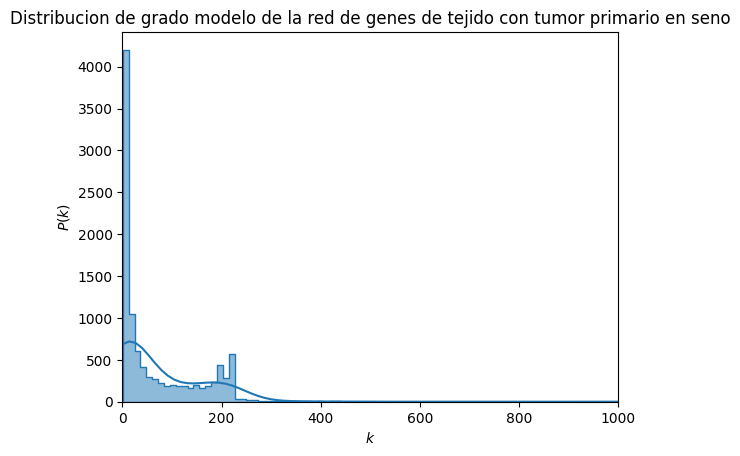

In [6]:
anch = 30
alt = anch/float(1.6180334)
p = sns.histplot(seqgenes,stat='count',kde=True, fill= True, element='step',label='$< k > =$ %f \n $< C > =$ %f \n' % (k,C))
p.set(xlim = (0,1000), xlabel = "$k$", ylabel = "$P(k)$",title='Distribucion de grado modelo de la red de genes de tejido con tumor primario en seno')

## Para Tumor primario (Normalizado)  log^2

###Umbral >=0.3


In [7]:
#Lectura del archivo de la red a analizar
file = open("0.3.txt")

#G=nx.read_weighted_edgelist(file,create_using=nx.Graph(),nodetype=str)
G=nx.read_weighted_edgelist(file)

#read_edgelist(file,create_using=nx.Graph(),nodetype=str)
pos = nx.spring_layout(G,iterations = 100)

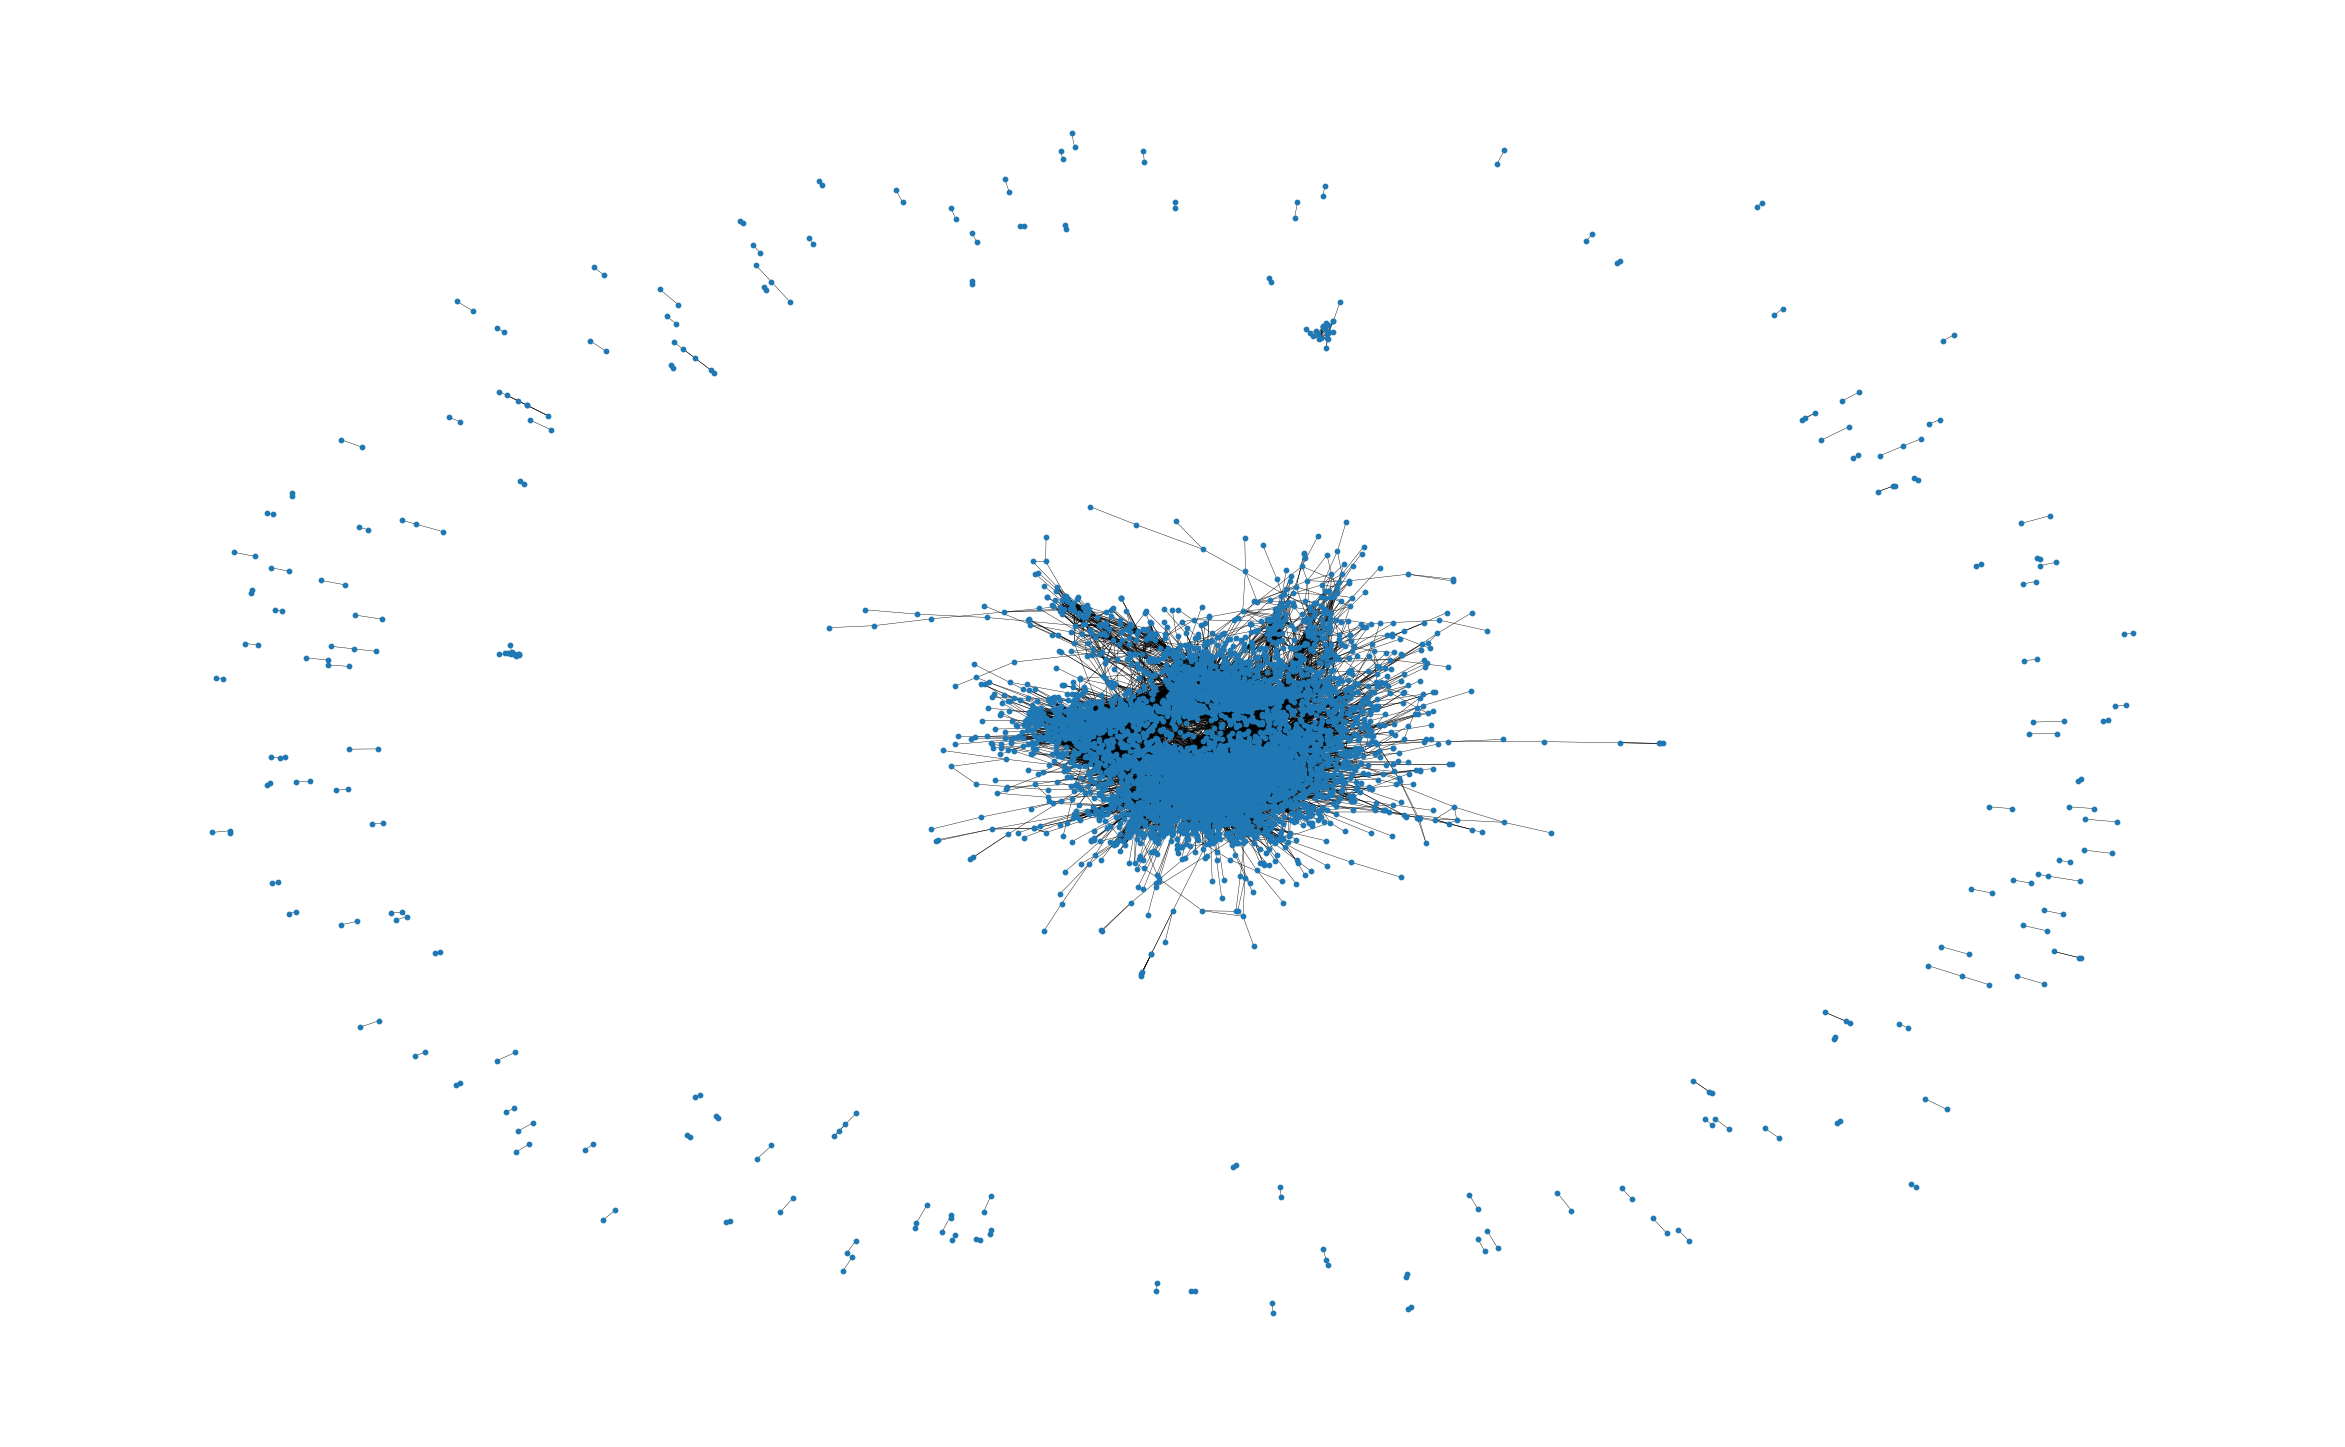

<Figure size 640x480 with 0 Axes>

In [8]:
#Impresión de la red que se pretende analizar. en 2D
anch = 30
alt = anch/float(1.6180334)
fig, ax = plt.subplots(figsize=(anch, alt))
nx.draw(G,node_size = 10, width = 0.3,)
plt.show()

plt.savefig("TejidoSanoNorm.jpg")
dgenes = dict(nx.degree(G))



In [9]:

#Ordenamiento de los valores
seqgenes = sorted(dgenes.values())

#Obtención de los parametros K, C y L de la red analizada
k = sum(dgenes.values()) / len(dgenes)    
C = nx.average_clustering(G)
#L = nx.average_path_length(G)

print("Grado promedio de los nodos: ", k)
print("Centralidad promedio de los nodos: ",C)
#print("Diámetro de la red: ", L)

Grado promedio de los nodos:  152.40140415140417
Centralidad promedio de los nodos:  0.4312664463148359


[(0.0, 1000.0),
 Text(0.5, 0, '$k$'),
 Text(0, 0.5, '$P(k)$'),
 Text(0.5, 1.0, 'Distribucion de grado modelo de la red de genes de Tejido con tumor primario en seno')]

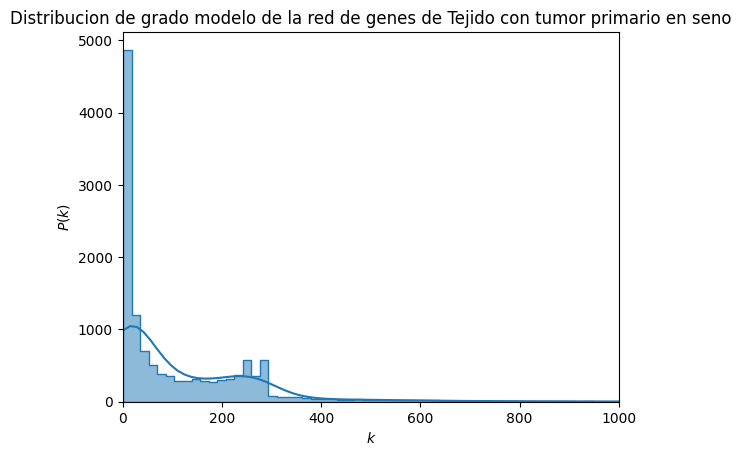

In [10]:
anch = 30
alt = anch/float(1.6180334)
p = sns.histplot(seqgenes,stat='count',kde=True, fill= True, element='step',label='$< k > =$ %f \n $< C > =$ %f \n' % (k,C))
p.set(xlim = (0,1000), xlabel = "$k$", ylabel = "$P(k)$",title='Distribucion de grado modelo de la red de genes de Tejido con tumor primario en seno')